In [2]:
import pandas as pd
from sklearn import datasets


boston = datasets.load_boston()
df = pd.DataFrame(boston.data[:, 12])

df.columns = ['LSTAT']
df['MEDV'] = boston.target

df.head()


,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [8]:
from sklearn.tree import DecisionTreeRegressor


X = df['LSTAT'].values
y = df['MEDV'].values

sort_idx = X.flatten().argsort()
X = X[sort_idx].reshape(1, -1)
y = y[sort_idx].reshape(1, -1)


regressor = DecisionTreeRegressor(criterion='mse', max_depth=3, random_state=1)
regressor.fit(X, y)


DecisionTreeRegressor(max_depth=3, random_state=1)

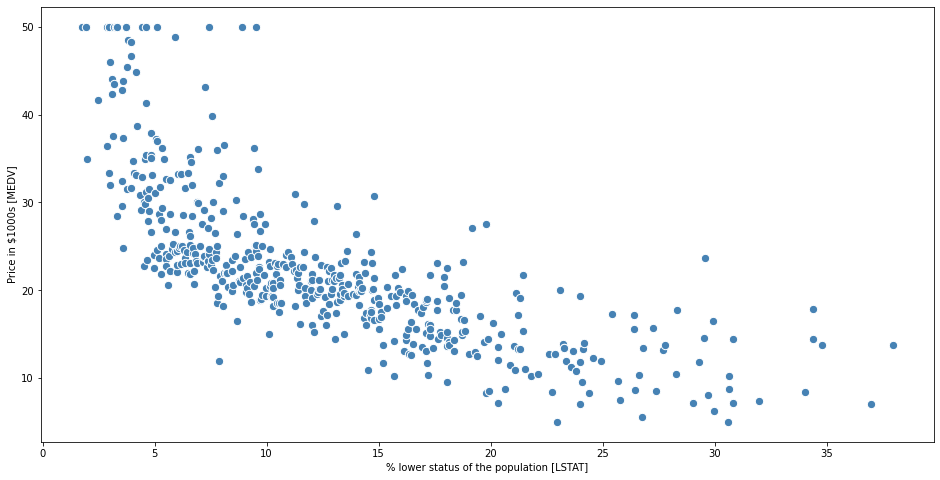

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
plt.plot(X, regressor.predict(X), color='black', lw=2)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()